In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Laptop_Price.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price AED
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3069.283378
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2059.507498
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1317.348000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,5813.399448
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4132.119744


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price AED'],
      dtype='object')

In [5]:
# Remove column "Unnamed: 0":
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price AED
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3069.283378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2059.507498
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1317.348000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,5813.399448
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4132.119744


In [6]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [7]:
# Check for duplicate rows:
df.duplicated().sum()

29

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price AED         1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(include = ['int32','int64','float32','float64']).columns
print(f'Categorical columns: {categorical_columns} \n{"-"*100}')
print(f'Numerical columns: {numerical_columns}')

Categorical columns: Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object') 
----------------------------------------------------------------------------------------------------
Numerical columns: Index(['Inches', 'Price AED'], dtype='object')


In [10]:
# function to find unique values for each columns:
def unq_values(column):
  print(f'Column {column} unique values are:\n{df[column].unique()}')

# function to find count of values for each columns:
def count_values(column):
  print(f'Column {column} counted values are:\n{df[column].value_counts()}')

In [11]:
for column in df.columns:
  unq_values(column)
  print(f'{"*"*100}')

Column Company unique values are:
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
****************************************************************************************************
Column TypeName unique values are:
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
****************************************************************************************************
Column Inches unique values are:
[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
****************************************************************************************************
Column ScreenResolution unique values are:
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscree

In [12]:
# extracting the numerical values from "Ram" & "Weight" columns.

df['Ram'] = df['Ram'].replace('GB','',regex = True)
df['Weight'] = df['Weight'].replace('kg','',regex = True)
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price AED
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price AED         1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### Exploratory Data Analysis

<Axes: xlabel='Price AED', ylabel='Density'>

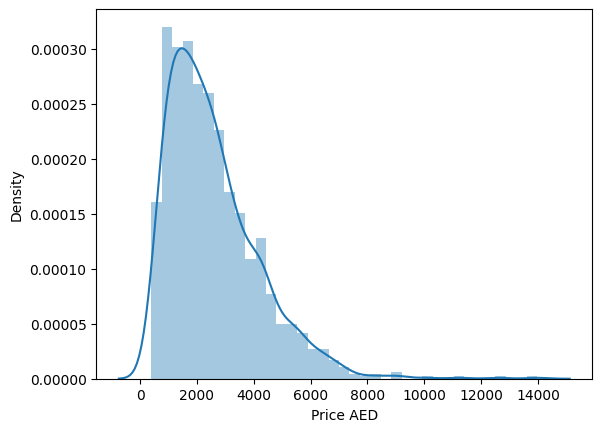

In [14]:
# Exploring Price values Distribution:

sns.distplot(df['Price AED'])

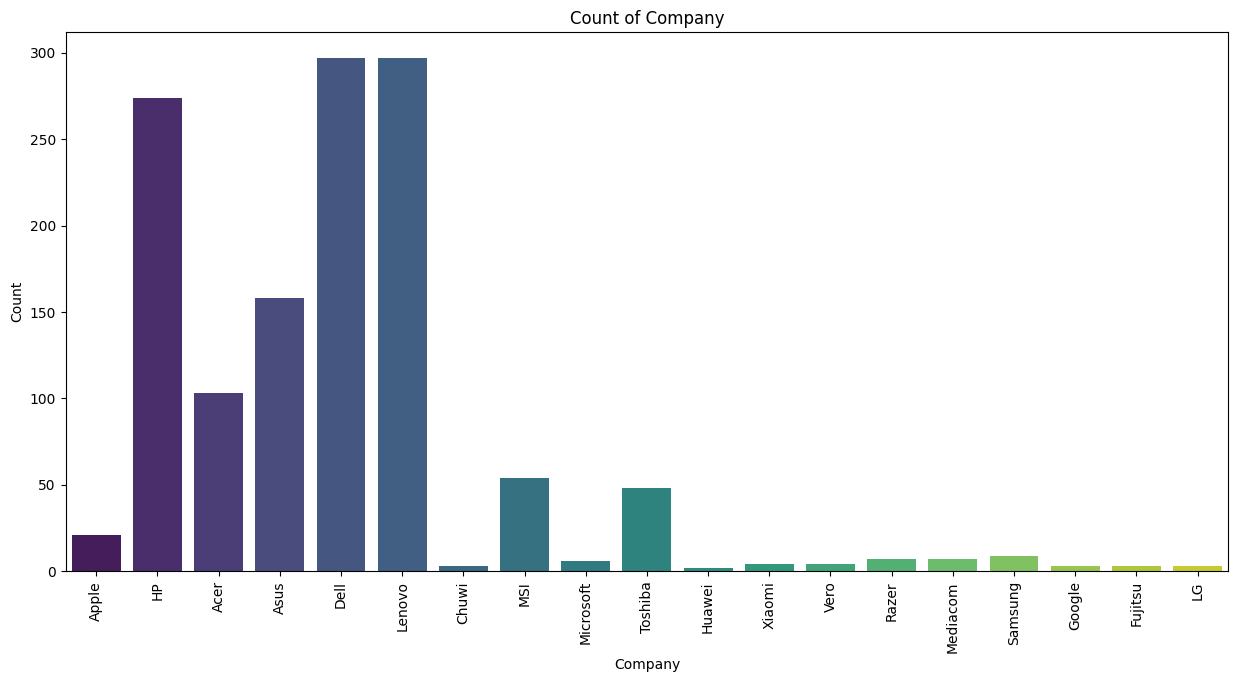

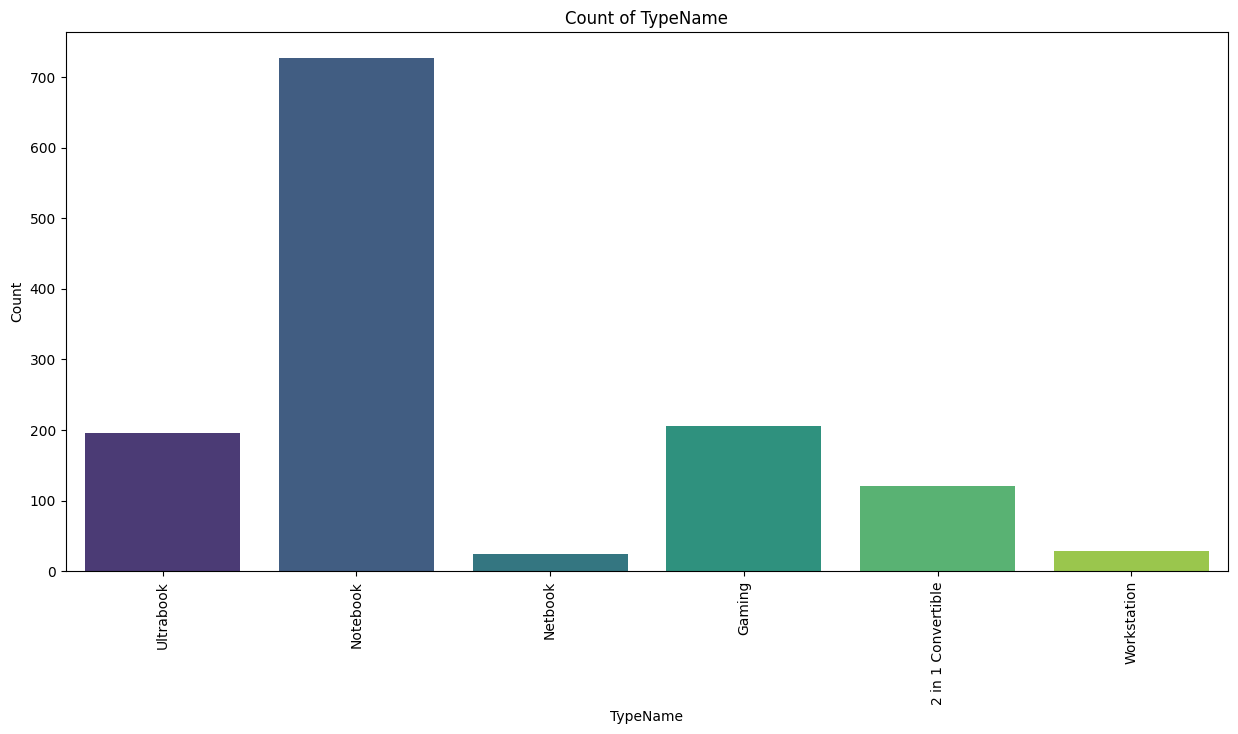

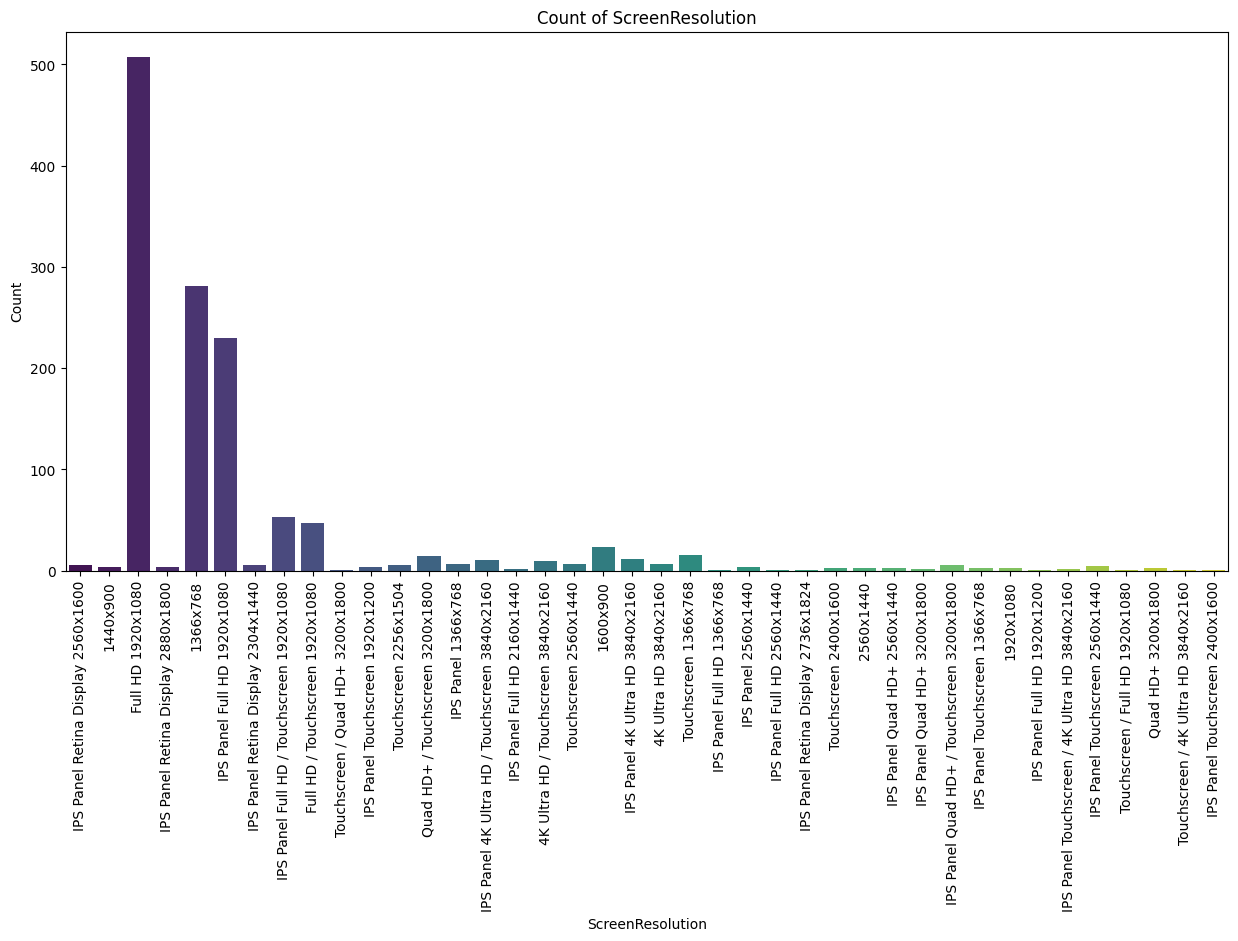

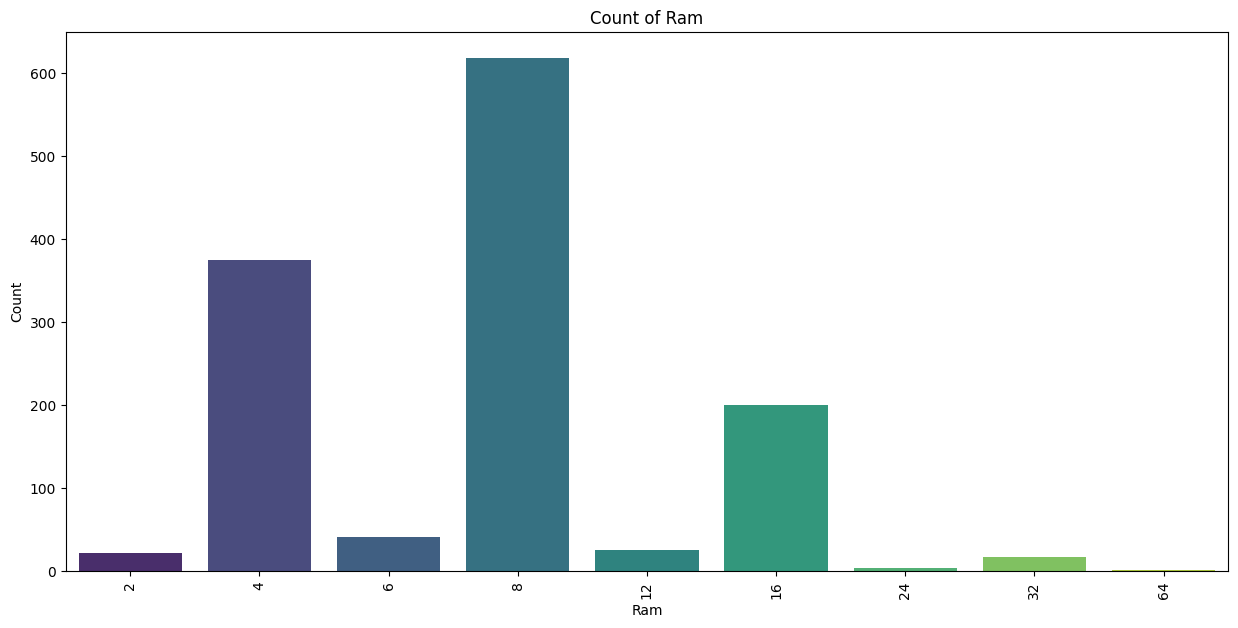

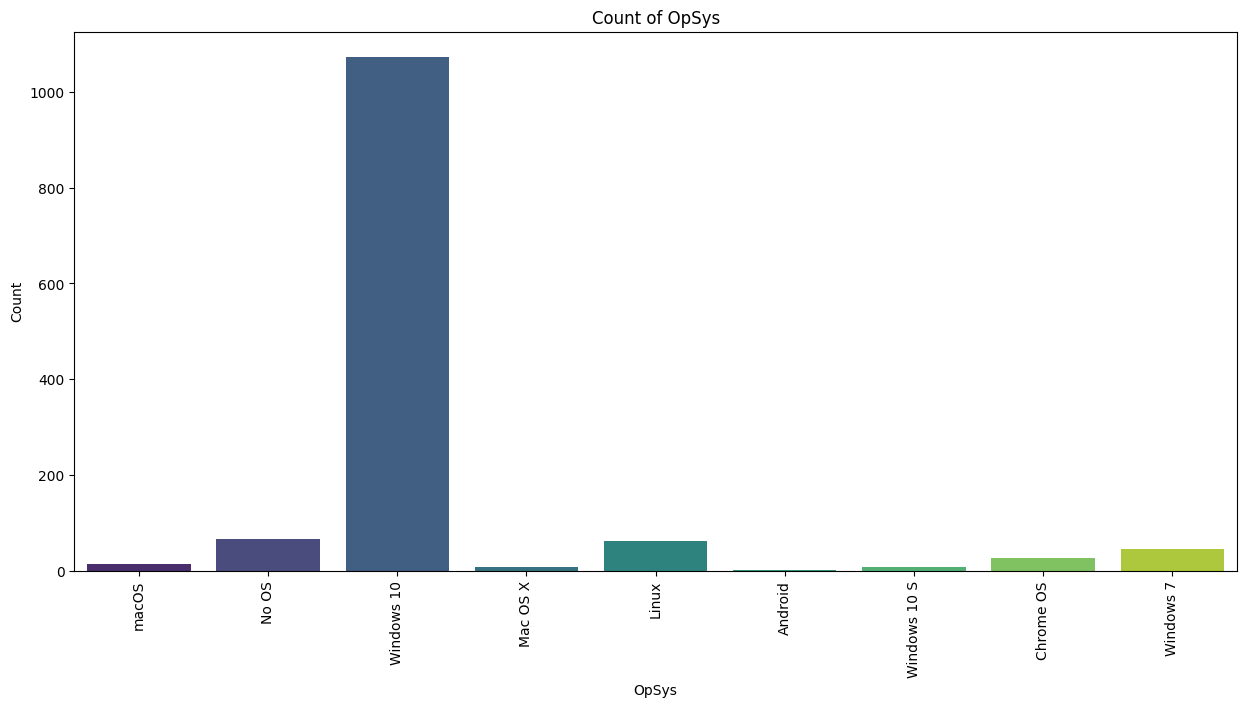

In [15]:
# Understanding informations from categorical variables:

# Function plots bar plot:
def bar_plot(feature):
  plt.figure(figsize=(15, 7))
  sns.countplot(x=feature, data=df, palette='viridis' )
  plt.xticks(rotation=90)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(f'Count of {feature}')
  plt.show()
cat_list = ['Company', 'TypeName', 'ScreenResolution', 'Ram' ,'OpSys']
for cat in cat_list:
  bar_plot(cat)

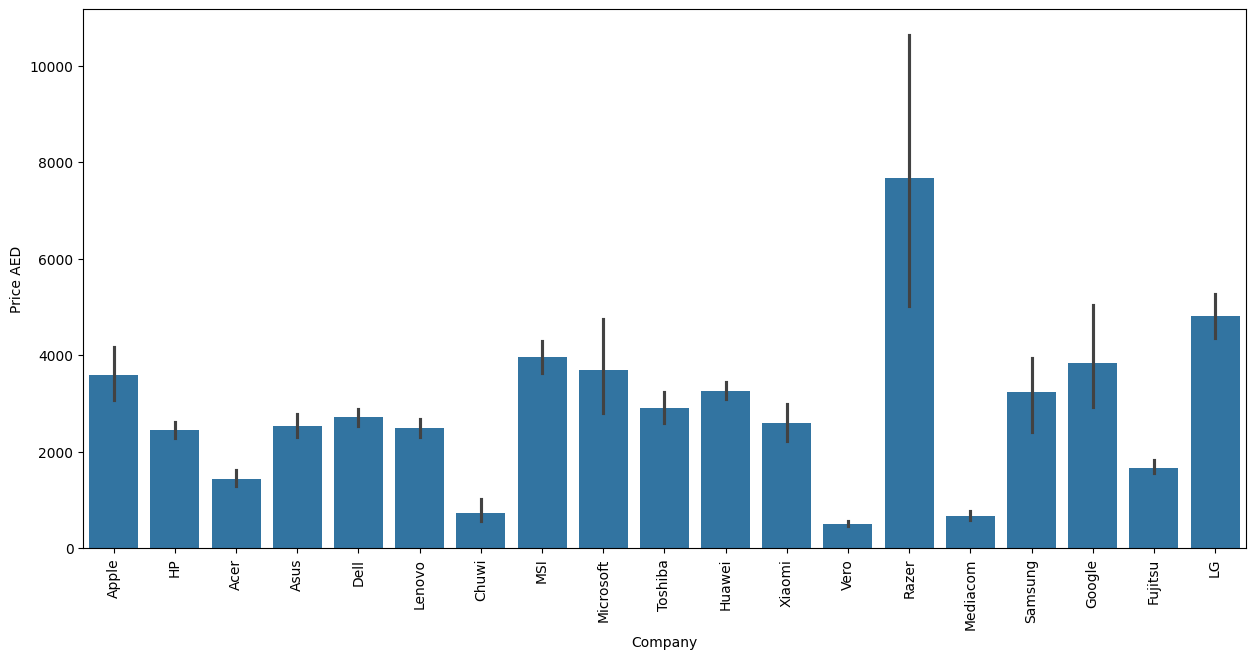

In [16]:
plt.figure(figsize=(15, 7))
sns.barplot(x=df['Company'],y=df['Price AED'] )
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

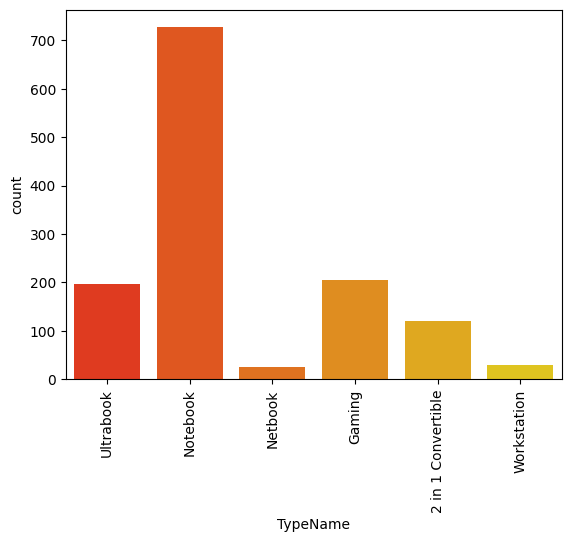

In [17]:
## various types of laptops

sns.countplot(x= df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

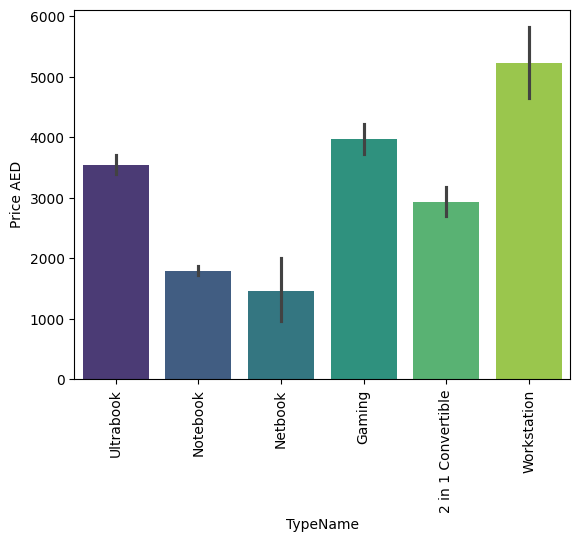

In [18]:
# laptop type and variation about the price

sns.barplot(x = df['TypeName'],y = df['Price AED'], palette='viridis')
plt.xticks(rotation = 'vertical')


<Axes: xlabel='Inches', ylabel='Price AED'>

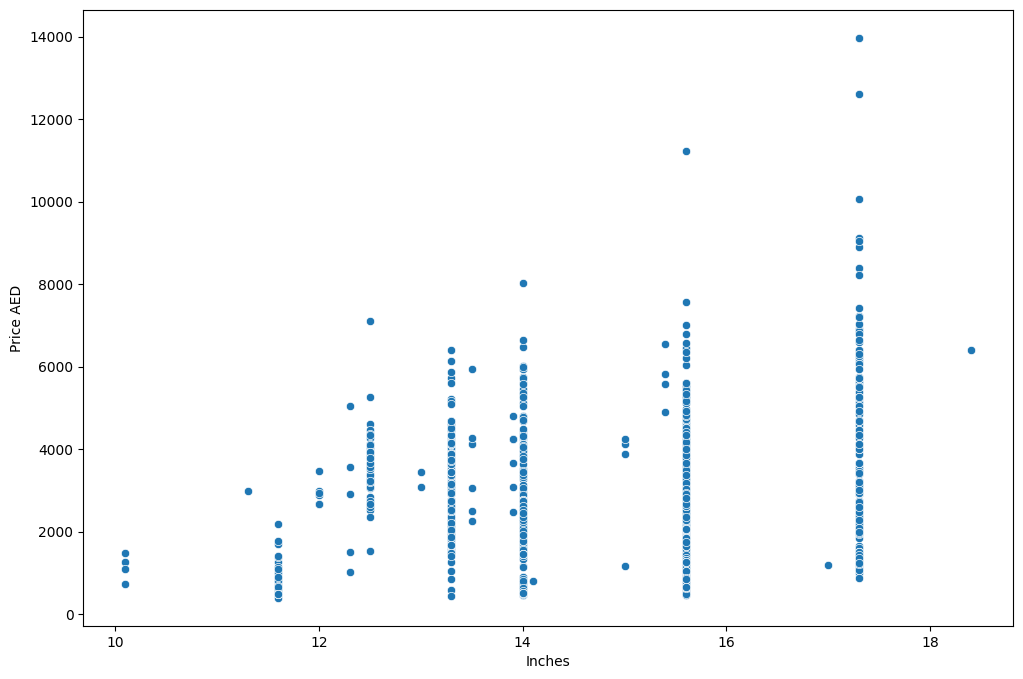

In [19]:
## Relationship between laptop screen size and the price:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Inches'],y=df['Price AED'])

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [20]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
            return 'AMD Processor'



df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5


In [21]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5


In [22]:
df['ScreenResolution'].value_counts() / df.shape[0] * 100

,count
ScreenResolution,
Full HD 1920x1080,38.910207
1366x768,21.565618
IPS Panel Full HD 1920x1080,17.651573
IPS Panel Full HD / Touchscreen 1920x1080,4.067536
Full HD / Touchscreen 1920x1080,3.607061
1600x900,1.765157
Touchscreen 1366x768,1.227936
Quad HD+ / Touchscreen 3200x1800,1.151190
IPS Panel 4K Ultra HD 3840x2160,0.920952


In [23]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0


In [24]:
df.TouchScreen.value_counts() / df.shape[0] * 100

,count
TouchScreen,
0,85.264774
1,14.735226


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

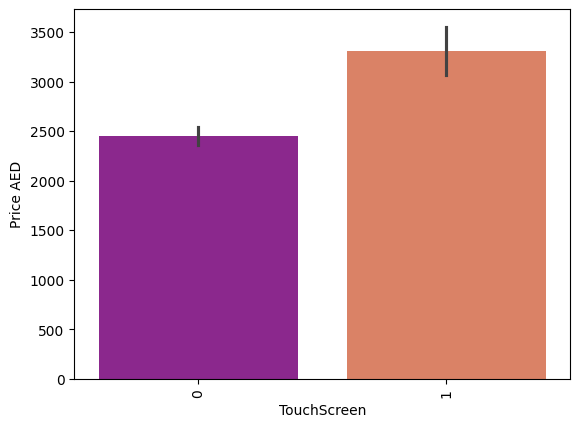

In [25]:
# touch screen on comparision with price of laptop

sns.barplot(x = df['TouchScreen'],y = df['Price AED'],palette='plasma')
plt.xticks(rotation = 'vertical')

In [26]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda x:1 if "IPS" in x else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS
786,MSI,Gaming,15.6,Full HD 1920x1080,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,2494.94256,Intel Core i5,0,0
298,Lenovo,Notebook,15.6,Full HD 1920x1080,6,1TB HDD,AMD Radeon R5 430,Windows 10,2.40,1143.22896,AMD Processor,0,0
501,HP,Notebook,15.6,1366x768,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,1418.13085,Intel Core i5,0,0
1121,HP,Notebook,13.3,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.16,3871.85760,Intel Core i5,0,0
477,Lenovo,Notebook,14.0,Full HD 1920x1080,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70,3124.97856,Intel Core i5,0,0


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

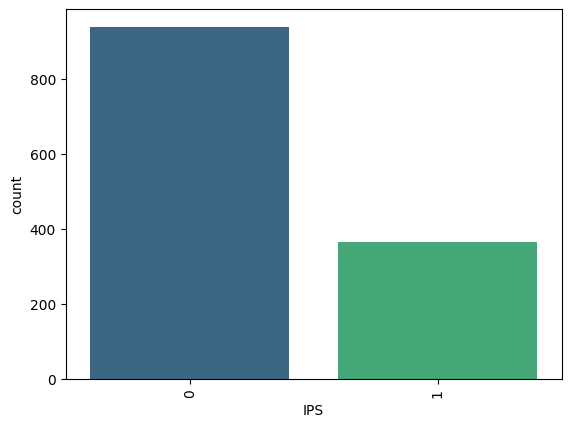

In [27]:
sns.countplot(x = df['IPS'], palette='viridis')
plt.xticks(rotation = 'vertical')

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

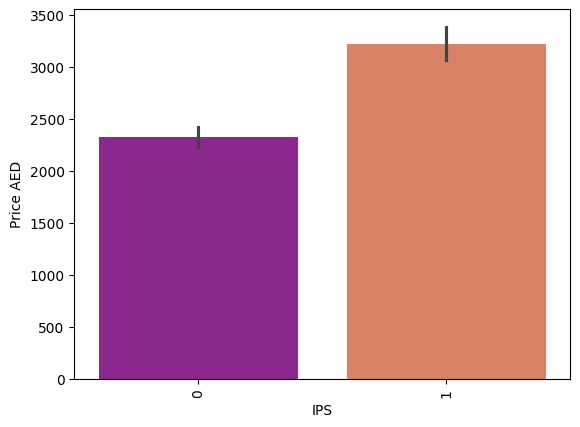

In [28]:
sns.barplot(x = df['IPS'],y = df['Price AED'],palette='plasma')
plt.xticks(rotation = 'vertical')

In [29]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

df['X_res'] = df['ScreenResolution'].str.split('x').str[0]
df['Y_res'] = df['ScreenResolution'].str.split('x').str[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,IPS Panel Retina Display 2560,1600


In [30]:
'''
So basically from that whole text of the X_res col,we need to
extract the digits from it,but the problem is the numbers are scattered
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.?
all the numbers which come after an number and \d+ the string must end with number


'''
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])



In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,2560,1600


In [32]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float32
 9   Price AED         1303 non-null   float64
 10  CPU_name          1303 non-null   object 
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

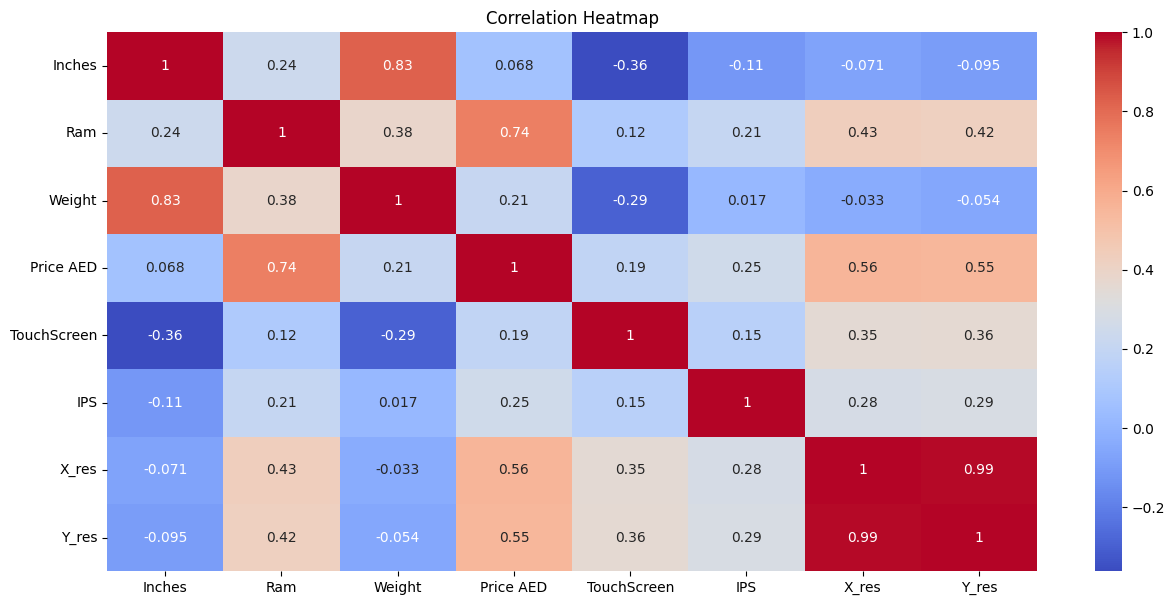

In [33]:
numerical_features = df.select_dtypes(include=np.number)

# Calculate correlation matrix:
corr_matrix = numerical_features.corr()

# Plot heatmap using the correlation matrix:
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [34]:
numerical_features.corr()['Price AED']

,Price AED
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price AED,1.000000
TouchScreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809


**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [35]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,2560,1600,226.983005


In [36]:
numerical_features = df.select_dtypes(include=np.number)
numerical_features.corr()['Price AED']

,Price AED
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price AED,1.000000
TouchScreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809
PPI,0.473487


In [37]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005


In [38]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [39]:
df['Memory'].value_counts() / df.shape[0] * 100

,count
Memory,
256GB SSD,31.619340
1TB HDD,17.114351
500GB HDD,10.130468
512GB SSD,9.056025
128GB SSD + 1TB HDD,7.214121
128GB SSD,5.832694
256GB SSD + 1TB HDD,5.602456
32GB Flash Storage,2.916347
2TB HDD,1.227936


In [40]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005


In [41]:
df['Memoryx'] = df['Memory'].str.replace('GB','')
df['Memoryx'] = df['Memory'].str.replace('TB','000')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,Memoryx
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128GB SSD
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,128GB Flash Storage
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256GB SSD
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512GB SSD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256GB SSD


In [42]:
df['Memoryx'] = df['Memoryx'].str.replace('1.0000','1000')
df['Memoryx'] = df['Memoryx'].str.replace('GB','')
df['Memoryx'].value_counts()

,count
Memoryx,
256 SSD,412
1000 HDD,224
500 HDD,132
512 SSD,118
128 SSD + 1000 HDD,94
128 SSD,76
256 SSD + 1000 HDD,73
32 Flash Storage,38
2000 HDD,16


In [43]:
def ssd(memory):
    if "SSD" in memory:
        try:
            parts = memory.replace('+', '').split()
            if memory.count("SSD") > 1:
                return str(int(parts[0]) + int(parts[2]))
            else:
                return parts[0]
        except (IndexError, ValueError):
            return "0"
    return "0"



In [44]:
df['SSD'] = df['Memoryx'].apply(ssd)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,Memoryx,SSD
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128 SSD,128
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,128 Flash Storage,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256 SSD,256
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512 SSD,512
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256 SSD,256


In [45]:
df['SSD'].value_counts()

,count
SSD,
256,498
0,460
128,172
512,138
1000,16
32,6
180,5
16,3
64,1


In [46]:
def hdd(memory):
    if "HDD" in memory:
        try:
            parts = memory.replace('+', '').split()
            if memory.count("HDD") > 1:
                return str(int(parts[0]) + int(parts[2]))
            else:
                return parts[0]
        except (IndexError, ValueError):
            return "0"
    return "0"


In [47]:
df['HDD'] = df['Memoryx'].apply(hdd)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,Memoryx,SSD,HDD
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128 SSD,128,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,128 Flash Storage,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256 SSD,256,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512 SSD,512,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256 SSD,256,0


In [48]:
df['HDD'].value_counts()

,count
HDD,
0,727
1000,226
500,132
128,97
256,85
2000,17
512,17
64,1
32,1


In [49]:
def ssd_pls_hdd(memory):
    if "SSD" in memory and "HDD" in memory:
        try:
            parts = memory.replace('+', '').split()
            ssd_value = int(parts[0])
            hdd_value = int(parts[2])
            return ssd_value + hdd_value
        except (IndexError, ValueError):
            pass
    return 0



In [50]:
df['SSD_HDD'] = df['Memoryx'].apply(ssd_pls_hdd)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,Memoryx,SSD,HDD,SSD_HDD
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128 SSD,128,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,128 Flash Storage,0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256 SSD,256,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512 SSD,512,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256 SSD,256,0,0


In [51]:
df['SSD_HDD'].value_counts()

,count
SSD_HDD,
0,1103
1128,94
1256,73
1512,14
2256,10
2512,3
756,2
2128,2
2000,2


In [52]:
def flash_storage(memory):
    if "Flash Storage" in memory:
        try:
            # Extract the numeric value before "Flash Storage"
            parts = memory.split()
            return int(parts[0]) if parts[0].isdigit() else 0
        except (IndexError, ValueError):
            return 0
    return 0

In [53]:
df['flash_storage'] = df['Memoryx'].apply(flash_storage)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,Memoryx,SSD,HDD,SSD_HDD,flash_storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128 SSD,128,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,128 Flash Storage,0,0,0,128
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256 SSD,256,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512 SSD,512,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256 SSD,256,0,0,0


In [54]:
df['flash_storage'].value_counts()

,count
flash_storage,
0,1228
32,38
64,16
256,8
16,7
128,4
512,2


In [55]:
for col in ['SSD','HDD','SSD_HDD','flash_storage']:
  df[col] = df[col].astype('int')

In [56]:
numerical_features = df.select_dtypes(include=np.number)
numerical_features.corr()['Price AED']

,Price AED
Ram,0.743007
Weight,0.210370
Price AED,1.000000
TouchScreen,0.191226
IPS,0.252208
PPI,0.473487
SSD,0.670799
HDD,-0.303340
SSD_HDD,0.309986
flash_storage,-0.040511


In [57]:
df.drop(columns=['Memory','Memoryx','flash_storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256,0,0


In [58]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [59]:
company_name = df['Gpu'].iloc[0]
company_name.split()[0]

'Intel'

([0, 1, 2, 3],
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'ARM')])

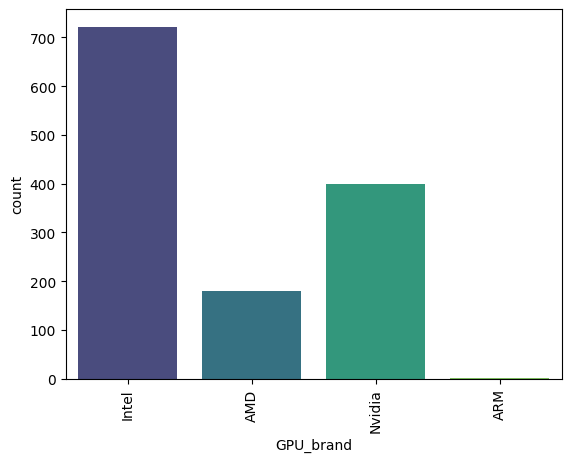

In [60]:
df['GPU_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(x = df['GPU_brand'], palette='viridis')
plt.xticks(rotation = 'vertical')

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

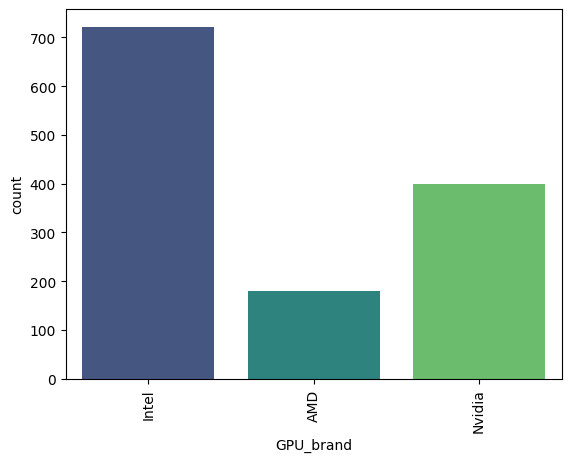

In [61]:
# removing the "ARM" tuple

df = df[df['GPU_brand']!='ARM']
sns.countplot(x = df['GPU_brand'], palette='viridis')
plt.xticks(rotation = 'vertical')

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

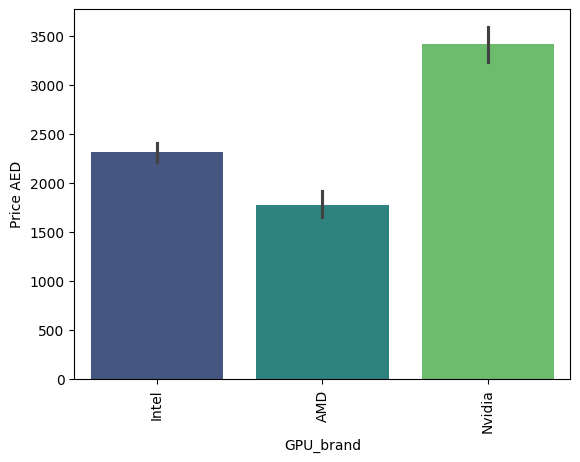

In [62]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sns.barplot(x = df['GPU_brand'],y = df['Price AED'], palette='viridis')
plt.xticks(rotation = 'vertical')

In [63]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD,GPU_brand
0,Apple,Ultrabook,8,macOS,1.37,3069.283378,Intel Core i5,0,1,226.983005,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,2059.507498,Intel Core i5,0,0,127.677940,0,0,0,Intel
2,HP,Notebook,8,No OS,1.86,1317.348000,Intel Core i5,0,0,141.211998,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,5813.399448,Intel Core i7,0,1,220.534624,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,4132.119744,Intel Core i5,0,1,226.983005,256,0,0,Intel


In [64]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


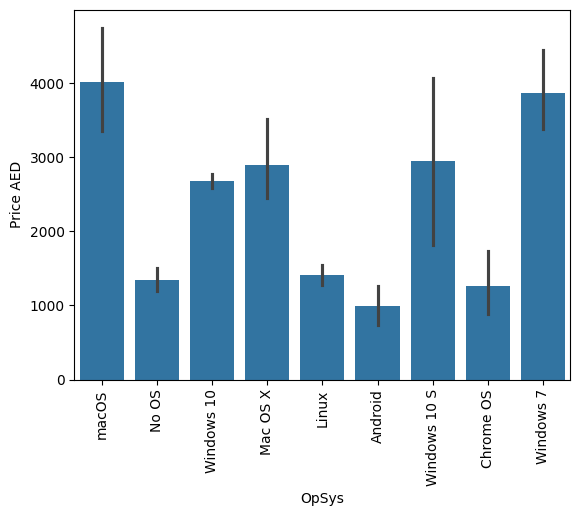

In [65]:
sns.barplot(x = df['OpSys'], y = df['Price AED'])
plt.xticks(rotation = 'vertical')
plt.show()

In [66]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [67]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def categorize_os(os_name):
    if os_name in {"Windows 10", "Windows 7", "Windows 10 S"}:
        return "Windows"
    elif os_name in {"macOS", "Mac OS X"}:
        return "Mac"
    else:
        return "Others"


In [68]:
df['OpSys'] = df['OpSys'].apply(lambda x:categorize_os(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD,GPU_brand
0,Apple,Ultrabook,8,Mac,1.37,3069.283378,Intel Core i5,0,1,226.983005,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,2059.507498,Intel Core i5,0,0,127.677940,0,0,0,Intel
2,HP,Notebook,8,Others,1.86,1317.348000,Intel Core i5,0,0,141.211998,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,5813.399448,Intel Core i7,0,1,220.534624,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,4132.119744,Intel Core i5,0,1,226.983005,256,0,0,Intel


<Axes: xlabel='OpSys', ylabel='count'>

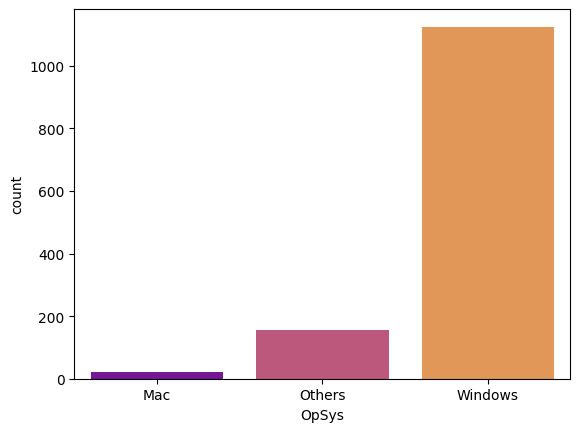

In [69]:
sns.countplot(x = df['OpSys'],palette='plasma')

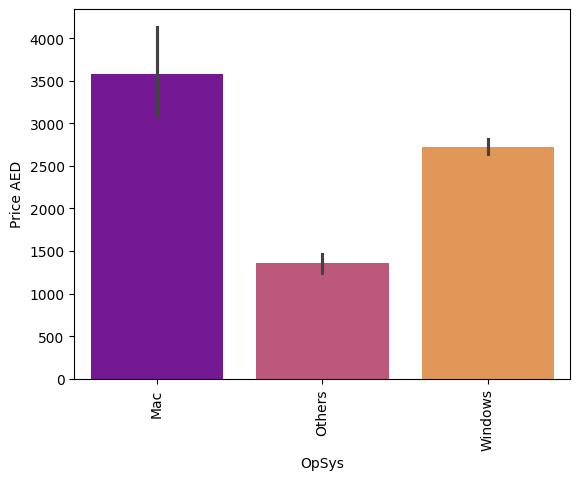

In [70]:
sns.barplot(x = df['OpSys'], y = df['Price AED'] ,palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

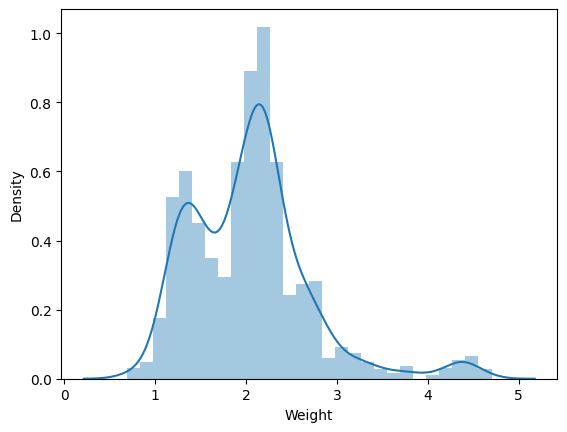

In [71]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price AED'>

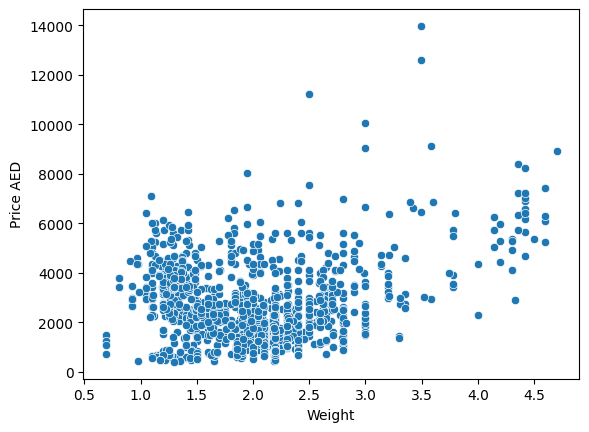

In [72]:
sns.scatterplot(x = df['Weight'],y = df['Price AED'])

<Axes: xlabel='Price AED', ylabel='Density'>

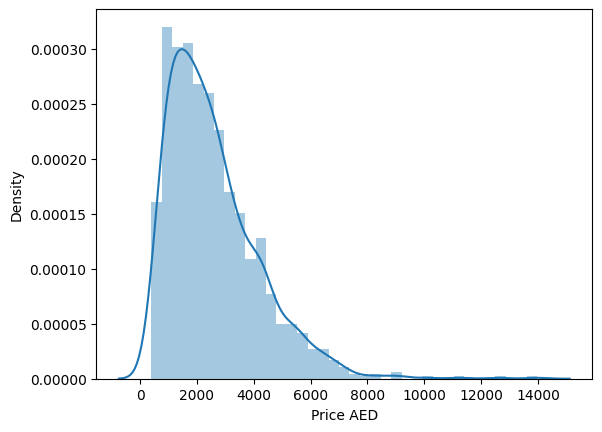

In [73]:
sns.distplot(df['Price AED'])

<Axes: xlabel='Price AED', ylabel='Density'>

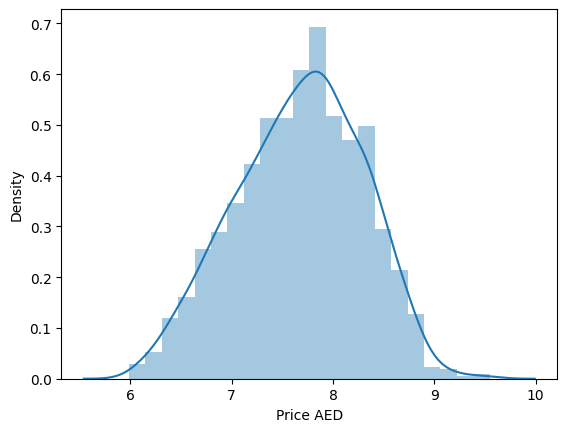

In [74]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(df['Price AED']))

In [75]:
numerical_features = df.select_dtypes(include=np.number)
numerical_features.corr()['Price AED']

,Price AED
Ram,0.742905
Weight,0.209867
Price AED,1.000000
TouchScreen,0.192917
IPS,0.253320
PPI,0.475368
SSD,0.670660
HDD,-0.303785
SSD_HDD,0.309848


<Axes: >

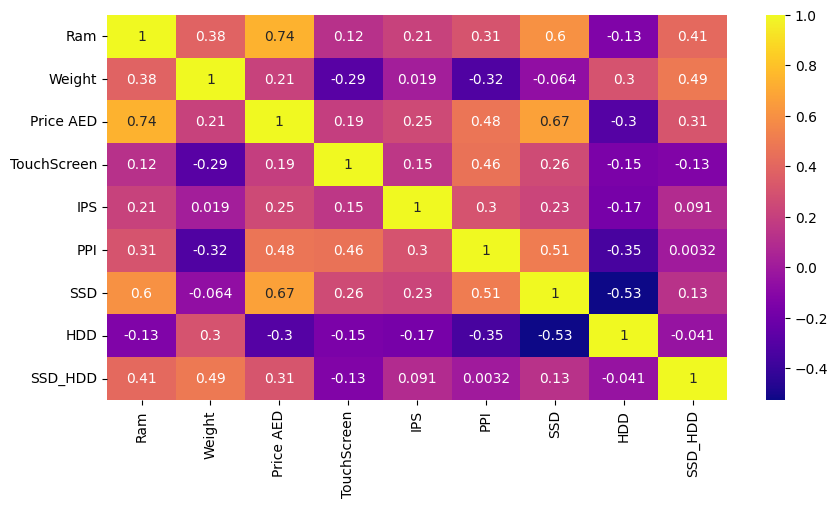

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical_features.corr(),annot=True,cmap='plasma')

In [77]:
df['CPU_name'].value_counts()

,count
CPU_name,
Intel Core i7,527
Intel Core i5,423
Other Intel Processor,154
Intel Core i3,136
AMD Processor,62


## Model Building

In [78]:
test = np.log(df['Price AED'])
train = df.drop(columns=['Price AED'],axis=1)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [80]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.15,random_state=2)
X_train.shape,X_test.shape

((1106, 13), (196, 13))

Indentify columns indecies:

In [81]:
mapping = {i:val for i,val in enumerate(X_train.columns)}
mapping

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'CPU_name',
 6: 'TouchScreen',
 7: 'IPS',
 8: 'PPI',
 9: 'SSD',
 10: 'HDD',
 11: 'SSD_HDD',
 12: 'GPU_brand'}

## Linear  Regression:

In [82]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,5,12]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('ohe_step',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,5,12])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8086743451657288
MAE 0.2099095846707004


In [83]:
# Actual value of mean squared error:
np.exp(metrics.mean_absolute_error(y_test,y_pred))

1.2335665215911675

## Ridge  Regression:

In [84]:
step1 = ColumnTransformer(transformers=[
    ('ohe_step',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,5,12])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8135925865789316
MAE 0.20918962885515932


## LassoRegression:

In [85]:
step1 = ColumnTransformer(transformers=[
    ('ohe_step',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,5,12])
],remainder='passthrough')


step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8082366514244085
MAE 0.21140270768127822


## Decision Tree Regressor:

In [86]:
step1 = ColumnTransformer(transformers=[
    ('ohe_step',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,5,12])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8316892781082201
MAE 0.18551380732503273


## Random Forest Regressor:

In [87]:
step1 = ColumnTransformer(transformers=[
    ('ohe_step',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,5,12])
],remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8864780684983904
MAE 0.15874702810853586


In [88]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [89]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,CPU_name,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD,GPU_brand
0,Apple,Ultrabook,8,Mac,1.37,Intel Core i5,0,1,226.983005,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,Intel Core i5,0,0,127.677940,0,0,0,Intel
2,HP,Notebook,8,Others,1.86,Intel Core i5,0,0,141.211998,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,Intel Core i7,0,1,220.534624,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,Intel Core i5,0,1,226.983005,256,0,0,Intel


In [90]:
train.to_csv('trained_data.csv',index=False)

## Hyperparameter Tuning for Random Forest

In [91]:
indexlist = [0,1,3,5,12]
transformlist = []
for key,value in mapping.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'GPU_brand']

In [92]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Others,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,GPU_brand_Intel,GPU_brand_Nvidia
0,8,1.37,0,1,226.983005,128,0,0,True,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.677940,0,0,0,True,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.211998,256,0,0,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534624,512,0,0,True,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.983005,256,0,0,True,False,...,True,False,False,False,False,True,False,False,True,False


In [93]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 39), (196, 39))

[Text(0.4922179716149073, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 7.675'),
 Text(0.21980912043251916, 0.9347826086956522, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 7.063'),
 Text(0.35601354602371327, 0.9565217391304348, 'True  '),
 Text(0.13999011606967454, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 7.24'),
 Text(0.09333151889201755, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 7.086'),
 Text(0.0398488147469059, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 7.037'),
 Text(0.007334162792220549, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 7.44'),
 Text(0.005238687708728963, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 7.331'),
 Text(0.004190950166983171, 0.6739130434782609, 'squared_

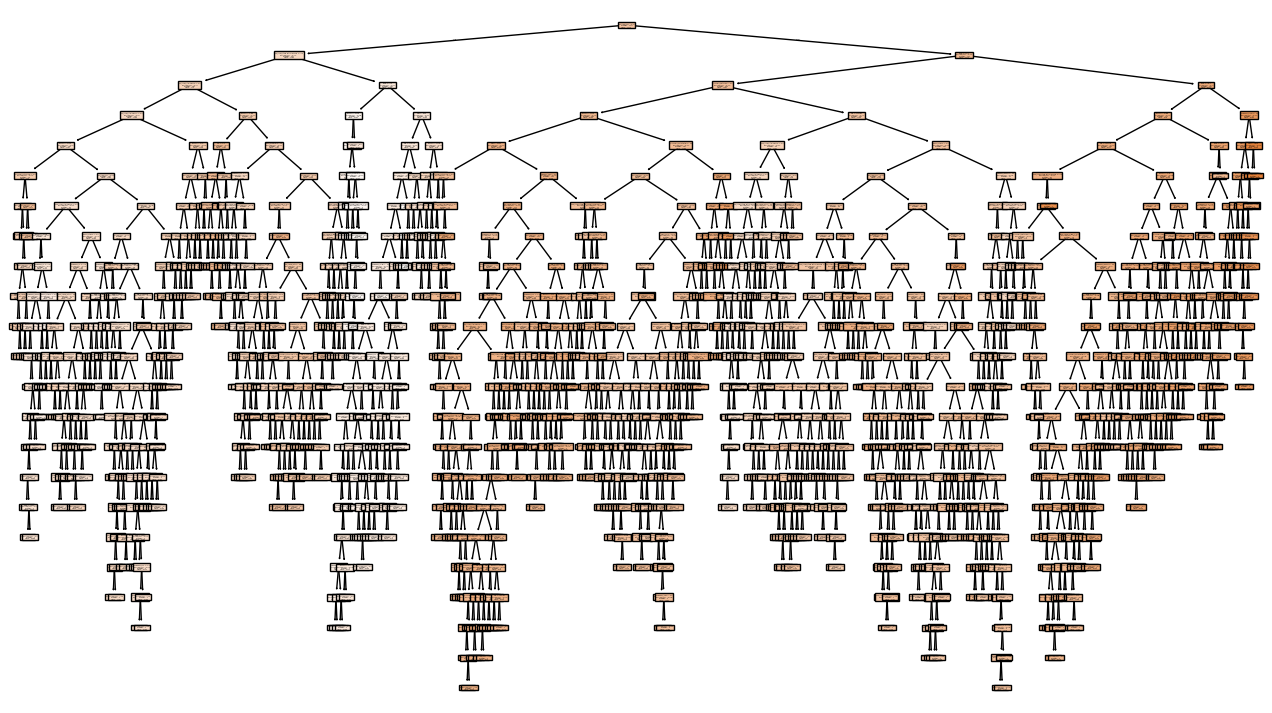

In [94]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [95]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [96]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

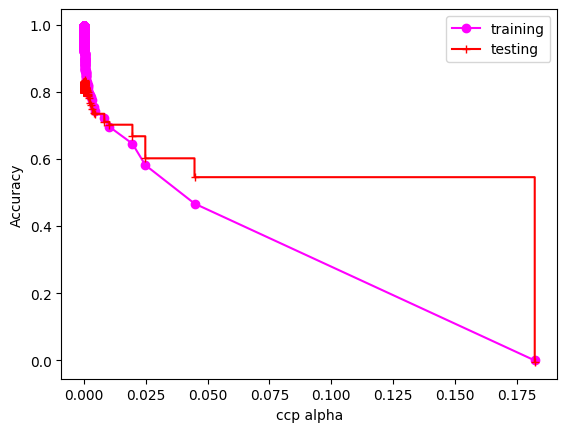

In [97]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between `[0.0025-->0.0075]`**

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 7.675'),
 Text(0.25, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 7.063'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 7.24'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 6.635'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 7.972'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 7.821'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 8.025'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 7.629'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 7.237'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 7.731'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 8.411')]

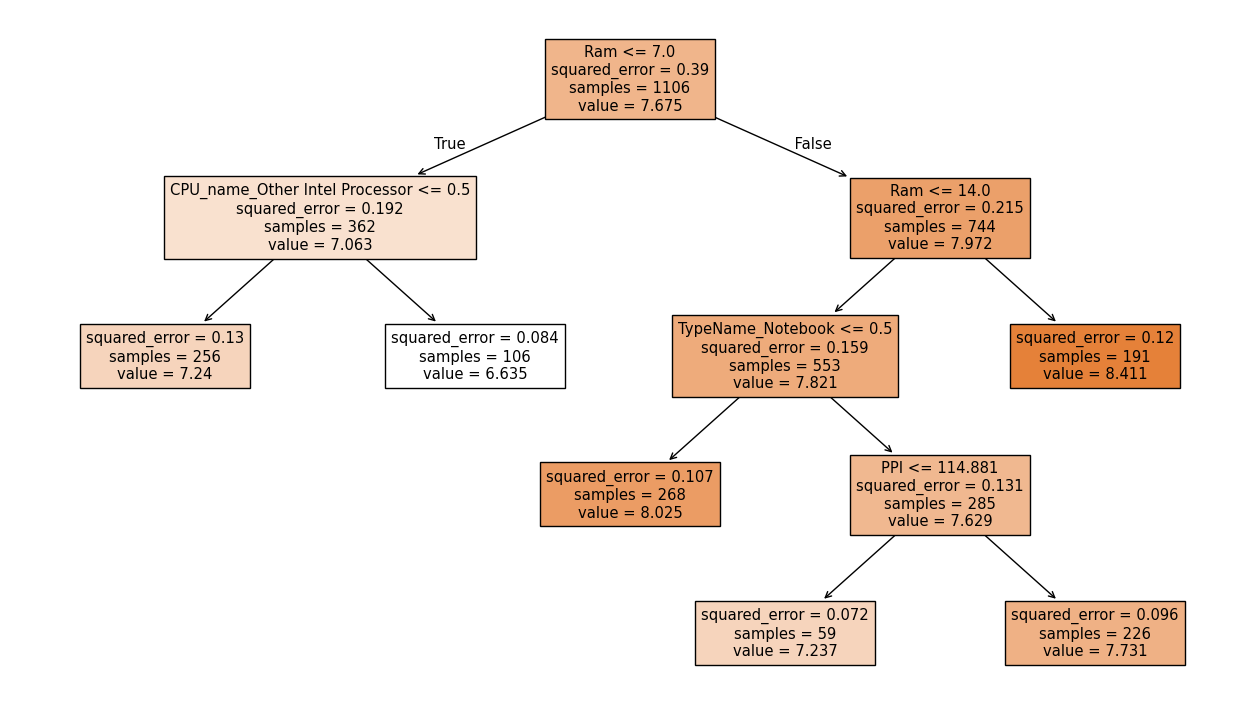

In [98]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter dictionary
params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(100, 1200, 10)],
            'criterion': ["squared_error", "absolute_error", "poisson", "friedman_mse"],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['sqrt', 'log2', None],  # 'auto' replaced with None
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ["squared_error", "absolute_error", "poisson", "friedman_mse"],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['sqrt', 'log2', None],  # 'auto' replaced with None
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    }
}

# Perform RandomizedSearchCV and collect scores
scores = []
for model_name, mp in params.items():
    print(f"Optimizing hyperparameters for: {model_name}")
    clf = RandomizedSearchCV(
        mp['model'],
        param_distributions=mp['params'],
        cv=5,
        n_iter=10,
        scoring='neg_mean_squared_error',
        verbose=2,  # Moderate verbosity
        random_state=42  # Ensures reproducibility
    )
    clf.fit(X_train, y_train)
    scores.append({
        'model_name': model_name,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_,
    })

# Output results
for score in scores:
    print(f"Model: {score['model_name']}")
    print(f"Best Score: {score['best_score']}")
    print(f"Best Estimator: {score['best_estimator']}")
    print()


Optimizing hyperparameters for: RandomForest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=10, min_samples_split=14, n_estimators=711; total time=   2.2s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=10, min_samples_split=14, n_estimators=711; total time=   2.4s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=10, min_samples_split=14, n_estimators=711; total time=   3.5s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=10, min_samples_split=14, n_estimators=711; total time=   2.1s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=15, max_features=None, min_samples_leaf=10, min_samples_split=14, n_estimators=711; total time=   2.1s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=8, max_features=None, min_samples_leaf=5, 

In [118]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.077526,"(DecisionTreeRegressor(ccp_alpha=0.0025, max_d..."
1,Decision Tree,-0.085367,"DecisionTreeRegressor(ccp_alpha=0.0025, criter..."


In [119]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8864780684983904


## Prediction on the whole Dataset

In [120]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

[array([8.09166511]),
 array([8.04836005]),
 array([7.669221]),
 array([8.41747177]),
 array([8.1073186]),
 array([7.06644194]),
 array([8.41220262]),
 array([8.04836005]),
 array([8.37066987]),
 array([7.89522732]),
 array([7.33886385]),
 array([7.06213358]),
 array([8.41539214]),
 array([7.08258113]),
 array([8.10802625]),
 array([8.1073186]),
 array([7.75657312]),
 array([8.41747177]),
 array([7.52470659]),
 array([8.06785804]),
 array([6.63037317]),
 array([7.86080713]),
 array([7.04649366]),
 array([7.89562236]),
 array([7.95084988]),
 array([7.06629423]),
 array([8.04836005]),
 array([7.73966371]),
 array([7.94253708]),
 array([7.60894211]),
 array([6.63461957]),
 array([7.18948809]),
 array([7.08222958]),
 array([8.41647025]),
 array([8.04836005]),
 array([6.63461957]),
 array([7.04668981]),
 array([7.78234854]),
 array([7.3626167]),
 array([7.74282983]),
 array([7.06247745]),
 array([8.28936814]),
 array([7.23900914]),
 array([7.35526063]),
 array([7.89470103]),
 array([8.10731

In [121]:
# As we transformed our price variable to np.log
# We have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [122]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD,GPU_brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,3069.283378,Intel Core i5,0,1,226.983005,128,0,0,Intel,3267.123149
1,Apple,Ultrabook,8,Mac,1.34,2059.507498,Intel Core i5,0,0,127.677940,0,0,0,Intel,3128.659920
2,HP,Notebook,8,Others,1.86,1317.348000,Intel Core i5,0,0,141.211998,256,0,0,Intel,2141.412644
3,Apple,Ultrabook,16,Mac,1.83,5813.399448,Intel Core i7,0,1,220.534624,512,0,0,AMD,4525.447623
4,Apple,Ultrabook,8,Mac,1.37,4132.119744,Intel Core i5,0,1,226.983005,256,0,0,Intel,3318.667417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1461.683520,Intel Core i7,1,1,157.350512,128,0,0,Intel,1331.997897
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,3434.268960,Intel Core i7,1,1,276.053530,512,0,0,Intel,4520.917542
1300,Lenovo,Notebook,2,Windows,1.50,524.648160,Other Intel Processor,0,0,111.935204,0,0,0,Intel,757.764891
1301,HP,Notebook,6,Windows,2.19,1750.354560,Intel Core i7,0,0,100.454670,0,1000,0,AMD,1226.305735


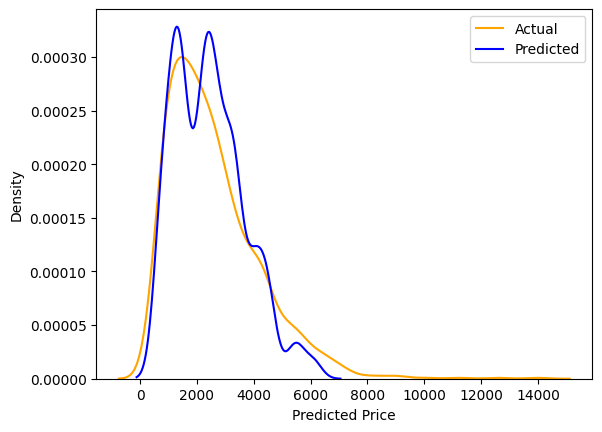

In [124]:
sns.distplot(df['Price AED'],hist=False,color='orange',label='Actual')
sns.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

## Random Forest Regressor version_2

In [125]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8843144550219565


In [126]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))

predicted

[array([8.03750175]),
 array([7.7428936]),
 array([7.40766655]),
 array([8.67859554]),
 array([8.1671518]),
 array([6.78080516]),
 array([8.35697643]),
 array([7.7428936]),
 array([8.28381833]),
 array([7.66013027]),
 array([7.09838119]),
 array([6.80840551]),
 array([8.58171268]),
 array([7.10782616]),
 array([8.00549769]),
 array([8.1671518]),
 array([7.60360461]),
 array([8.67859554]),
 array([7.1664332]),
 array([7.90204387]),
 array([6.3575384]),
 array([7.74905164]),
 array([6.55446719]),
 array([7.68550316]),
 array([7.69606449]),
 array([6.93098135]),
 array([7.77254216]),
 array([7.53351421]),
 array([8.05792184]),
 array([7.60295399]),
 array([6.49636045]),
 array([6.79170732]),
 array([7.05227838]),
 array([8.49431712]),
 array([7.77254216]),
 array([6.473772]),
 array([6.78372092]),
 array([7.72589822]),
 array([7.21142111]),
 array([7.63753969]),
 array([6.86098073]),
 array([8.12749973]),
 array([7.24026542]),
 array([7.39595713]),
 array([7.79515436]),
 array([8.1671518]

In [128]:
# As we transformed our price variable to np.log
# We have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [129]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price AED,CPU_name,TouchScreen,IPS,PPI,SSD,HDD,SSD_HDD,GPU_brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,3069.283378,Intel Core i5,0,1,226.983005,128,0,0,Intel,3094.871771
1,Apple,Ultrabook,8,Mac,1.34,2059.507498,Intel Core i5,0,0,127.677940,0,0,0,Intel,2305.132882
2,HP,Notebook,8,Others,1.86,1317.348000,Intel Core i5,0,0,141.211998,256,0,0,Intel,1648.574991
3,Apple,Ultrabook,16,Mac,1.83,5813.399448,Intel Core i7,0,1,220.534624,512,0,0,AMD,5875.788500
4,Apple,Ultrabook,8,Mac,1.37,4132.119744,Intel Core i5,0,1,226.983005,256,0,0,Intel,3523.294597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1461.683520,Intel Core i7,1,1,157.350512,128,0,0,Intel,1536.244250
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,3434.268960,Intel Core i7,1,1,276.053530,512,0,0,Intel,3700.187742
1300,Lenovo,Notebook,2,Windows,1.50,524.648160,Other Intel Processor,0,0,111.935204,0,0,0,Intel,565.652711
1301,HP,Notebook,6,Windows,2.19,1750.354560,Intel Core i7,0,0,100.454670,0,1000,0,AMD,1608.895060


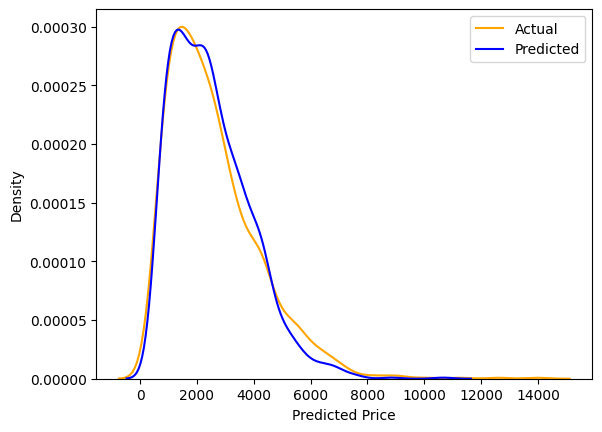

In [131]:
sns.distplot(data['Price AED'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [132]:
file = open('laptop_price_predictor.pkl','wb')
pickle.dump(rf1,file)
file.close()